# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>
<a href="https://www.hackerrank.com/kggold4?hr_r=1"><img src="images/hackerrank.png" width="25px" height="25px" align="left"></a>
<a href="https://stackoverflow.com/users/14749277/kfir-goldfarb"><img src="images/stackoverflow.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 2
<i>Dimensionality Reduction and PCA for Fashion MNIST</i>

## <i>In this notebook I will try to use unsupervised and ensemble learning models to get the best accuracy model for the Fashion MNIST dataset while I'm using Principal Component Analysis (PCA), the number of component I tested is:</i>
    1. 154 Components
    2. 50 Components
    3. 24 Components

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# sklearn tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
# import data:

# getting the train data
mnist_train = pd.read_csv("data/task_2/fashion-mnist_train.csv")

# getting the test data
mnist_test = pd.read_csv("data/task_2/fashion-mnist_test.csv")

# merge the two training and test files together and create my own training and test splits
mnist_ds = mnist_train.append(mnist_test)

X = mnist_ds.iloc[:,1:]
y = mnist_ds.iloc[:,0]

# split 70% of the data for train the models and 30% of them to test the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, shuffle=True)

In [3]:
# first five mnist:
# we can see that each row has 785 features
mnist_ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# seeing the mnist data widely
# we can see we have 10000 rows
mnist_ds.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.500000,0.000829,0.006743,0.037729,0.098371,0.242343,0.402571,0.808757,2.215843,5.649971,...,34.581886,23.268000,16.565943,17.86960,22.821271,17.894157,8.496757,2.723057,0.823229,0.069586
std,2.872302,0.088152,0.319931,1.472886,2.419523,4.360495,5.811048,8.269954,14.231137,23.754212,...,57.594114,48.882093,42.005114,43.99069,51.812432,45.146046,29.494913,17.261065,9.110774,2.099525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,45.000000,226.000000,185.000000,227.000000,230.000000,247.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


### <i>Helping Functions I Wrote:</i>

In [5]:
# function that print the accuracy of a classification model
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))

In [6]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

# <i>Ensemble Learning Models with Principal Component Analysis</i>

## 154 Component PCA:

In [7]:
pca_components = PCA(n_components=154)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (52500, 154)
shape of 2 component PCA test data is: (17500, 154)


In [8]:
pca_components.explained_variance_ratio_

array([0.28927104, 0.17796451, 0.06091757, 0.0494533 , 0.03881816,
       0.03503784, 0.02345711, 0.01865117, 0.01346906, 0.01320967,
       0.01007809, 0.0091226 , 0.00762562, 0.0066727 , 0.00610762,
       0.00582241, 0.0054484 , 0.00539187, 0.00466936, 0.00453687,
       0.00433259, 0.00403816, 0.00383634, 0.00372018, 0.00369098,
       0.00344518, 0.00330032, 0.00317123, 0.00313389, 0.0029902 ,
       0.00278846, 0.00265919, 0.00263243, 0.00257068, 0.00245777,
       0.00240626, 0.00231229, 0.00223463, 0.00219572, 0.00209806,
       0.0020084 , 0.00197365, 0.00194226, 0.00181049, 0.00175646,
       0.00169941, 0.0016598 , 0.00163423, 0.0016168 , 0.00155485,
       0.00152945, 0.00150241, 0.00146561, 0.00143926, 0.00139334,
       0.00137367, 0.00131608, 0.001282  , 0.00126622, 0.00125637,
       0.00121738, 0.00119413, 0.00117533, 0.0011605 , 0.00115232,
       0.00112975, 0.00111374, 0.00108546, 0.00107087, 0.00104904,
       0.00103334, 0.00101967, 0.00098573, 0.00095176, 0.00094

### Bagging Classifier:

In [9]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 68.79 %


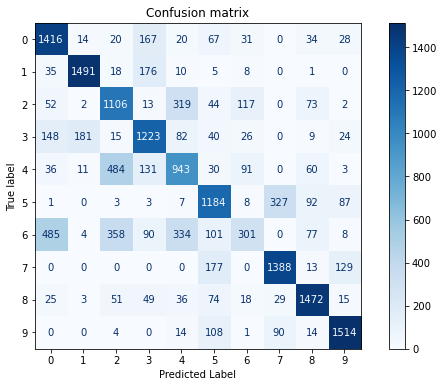

In [10]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [11]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 68.85 %


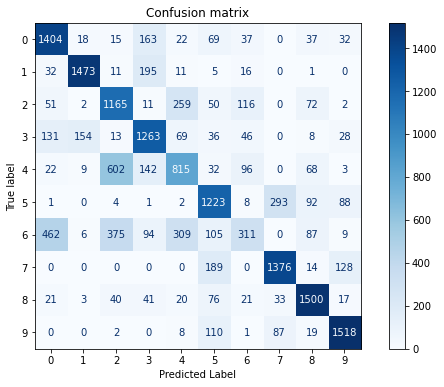

In [12]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [13]:
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 71.68 %


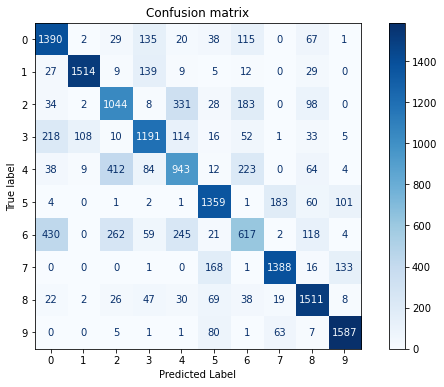

In [14]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [15]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 71.26 %


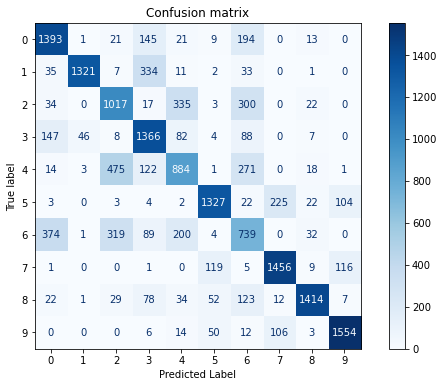

In [16]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Multi):

In [19]:
mul_xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

# print accuracy
print_accuracy(mul_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

[09:43:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model is: 73.41 %


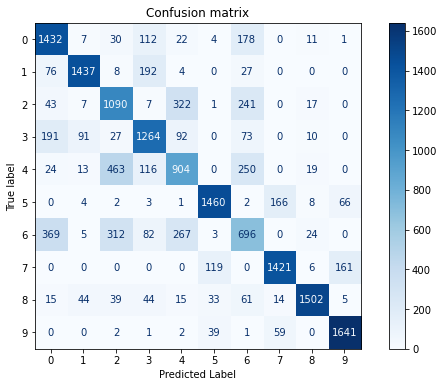

In [20]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(mul_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [21]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5,scoring='accuracy')

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [22]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))

0.8637904761904762 {'max_features': 20, 'n_estimators': 100}


### Grid Seach with Extreme Gradient Boostring Classifier(Multi):

In [25]:
mul_xgb_model= xgb.XGBClassifier(objective="multi:softmax", random_state=42).fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy')

gs_mul_xgb_model.fit(X_transformed_train, y_train)

[11:57:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:01:49] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:01:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:13] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in la

[12:29:11] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:29:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:03] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:33:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default 

[12:57:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:15] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:01:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:05:05] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in la

[13:29:58] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:33:48] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                    

In [26]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))

0.8789142857142858 {'max_features': 5, 'n_estimators': 100}


## 50 Component PCA:

In [27]:
pca_components = PCA(n_components=50)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (52500, 50)
shape of 2 component PCA test data is: (17500, 50)


In [28]:
pca_components.explained_variance_ratio_

array([0.28927104, 0.17796451, 0.06091757, 0.0494533 , 0.03881816,
       0.03503784, 0.02345711, 0.01865117, 0.01346906, 0.01320967,
       0.01007809, 0.0091226 , 0.00762562, 0.0066727 , 0.00610762,
       0.00582241, 0.0054484 , 0.00539187, 0.00466936, 0.00453687,
       0.00433259, 0.00403816, 0.00383634, 0.00372018, 0.00369098,
       0.00344518, 0.00330032, 0.00317122, 0.00313388, 0.0029902 ,
       0.00278844, 0.00265917, 0.00263241, 0.00257067, 0.00245763,
       0.00240617, 0.0023121 , 0.00223441, 0.00219558, 0.0020976 ,
       0.00200782, 0.00197231, 0.00193987, 0.00180932, 0.00175309,
       0.00169682, 0.00165503, 0.00162783, 0.00159994, 0.00154495])

### Bagging Classifier:

In [29]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 70.29 %


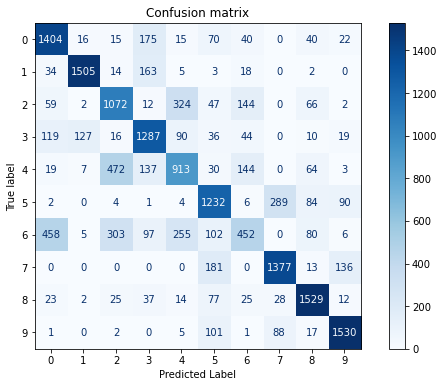

In [30]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [31]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 69.84 %


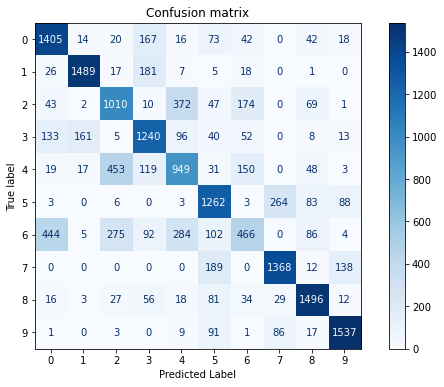

In [32]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [33]:
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 74.64 %


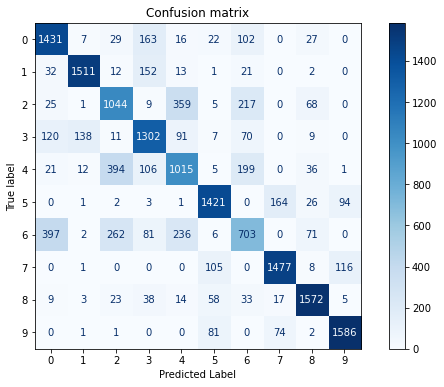

In [34]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [35]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 73.29 %


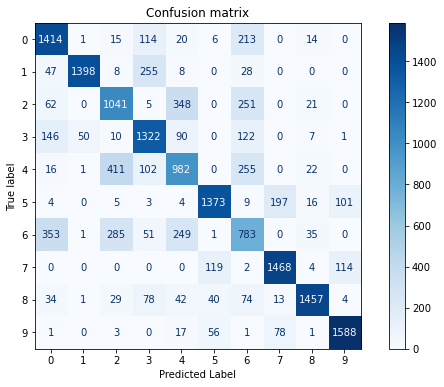

In [36]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [37]:
bin_xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# print accuracy
print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

[13:55:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model is: 73.23 %


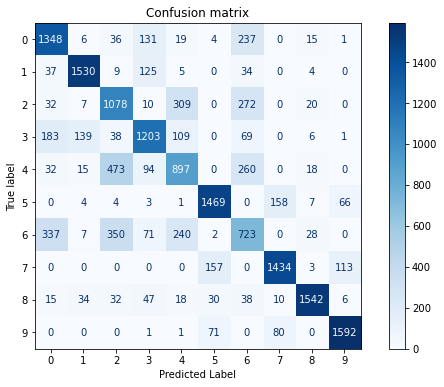

In [38]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Multi):

In [39]:
mul_xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

# print accuracy
print_accuracy(mul_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

[13:57:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model is: 73.23 %


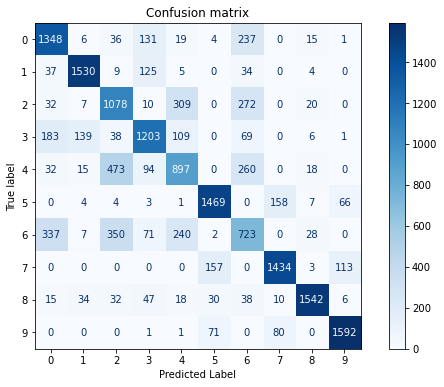

In [40]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(mul_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [41]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5,scoring='accuracy')

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [42]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))

0.8635238095238094 {'max_features': 10, 'n_estimators': 100}


### Grid Seach with Extreme Gradient Boostring Classifier(Multi):

In [45]:
mul_xgb_model= xgb.XGBClassifier(objective="multi:softmax", random_state=42).fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy')

gs_mul_xgb_model.fit(X_transformed_train, y_train)

[15:52:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:24] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:54:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:33] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in la

[16:05:18] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:48] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:06:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default 

[16:15:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:20] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in la

[16:27:58] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:27:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:27] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:29:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                    

In [47]:
print(gs_mul_xgb_model.best_score_,gs_mul_xgb_model.best_params_)

0.8715619047619046 {'max_features': 5, 'n_estimators': 100}


In [48]:
## 24 Component PCA:

In [49]:
pca_components = PCA(n_components=24)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (52500, 24)
shape of 2 component PCA test data is: (17500, 24)


In [50]:
pca_components.explained_variance_ratio_

array([0.28927104, 0.17796451, 0.06091757, 0.0494533 , 0.03881816,
       0.03503784, 0.02345711, 0.01865117, 0.01346906, 0.01320967,
       0.01007809, 0.0091226 , 0.00762562, 0.00667269, 0.00610761,
       0.00582239, 0.00544838, 0.00539186, 0.00466908, 0.00453668,
       0.00433203, 0.00403648, 0.00383548, 0.00371874])

### Bagging Classifier:

In [51]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 69.71 %


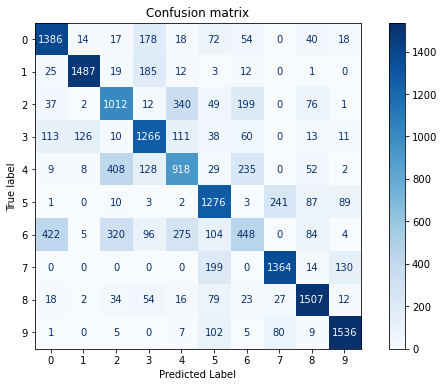

In [52]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [53]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 69.80 %


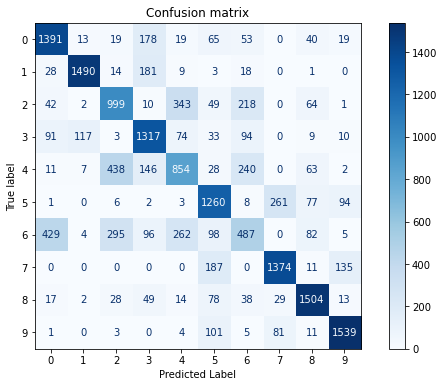

In [54]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [55]:
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 75.15 %


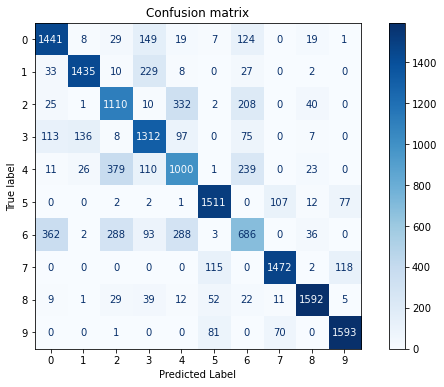

In [56]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [57]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 70.50 %


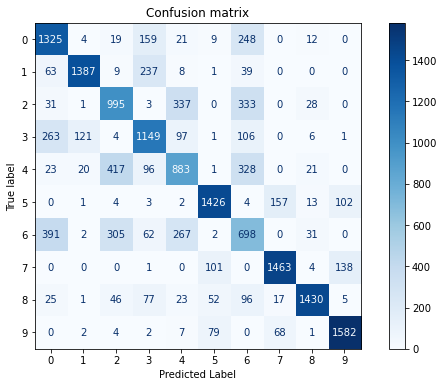

In [58]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Multi):

In [59]:
mul_xgb_model = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

# print accuracy
print_accuracy(mul_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

[16:57:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model is: 71.62 %


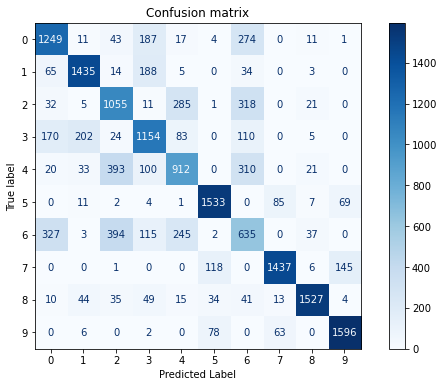

In [60]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(mul_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [61]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5,scoring='accuracy')

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [63]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))

0.8583047619047619 {'max_features': 5, 'n_estimators': 100}
